# Customer Churn Prediction using Logistic Regression

![](https://chartmogul.com/blog/wp-content/uploads/2022/02/blogWhat_s-a-good-Customer-Churn-Rate-scaled.jpeg)

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the data.
data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Check the 5 first rows of the dataset.
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get the size of the dataset.
data.shape

(7043, 21)

In [5]:
# Check for missing values.
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Description of the data in the dataframe.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Number of customers that were retained and churned.
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Create separate dataframes for retained and churned customers.
retained_cust=data[data.Churn == 'No']
churned_cust=data[data.Churn == 'Yes']

# Get the number of rows for each dataframe.
num_retained_cust=retained_cust.shape[0]
num_churned_cust=churned_cust.shape[0]
total_cust_num=data.shape[0]

# Percentage of customers that were retained and left (results rounded to 2 decimals).
print(round(num_retained_cust / total_cust_num * 100,2), "% of customers were retained.")
print(round(num_churned_cust / total_cust_num * 100,2), "% of customers have churned.")

73.46 % of customers were retained.
26.54 % of customers have churned.


# Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

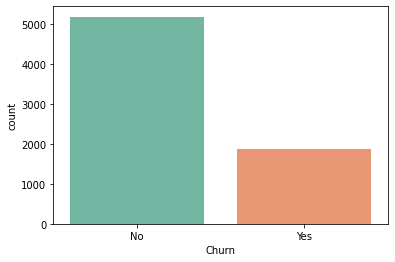

In [9]:
# Visualize the customer churn.
sns.countplot(data['Churn'], palette='Set2')

## Let's dive into the dataset to get some useful insights in regards to churn.
### We divide the variables into 3 main categories:
1. Customer demographics
2. Customer account information
3. Signed services

### 1. Customer demographics:

<AxesSubplot:xlabel='gender', ylabel='count'>

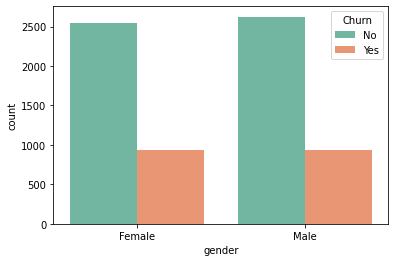

In [10]:
# Visualize the customer churn per gender.
sns.countplot(x='gender', hue='Churn', palette='Set2', data=data)

#### *Insight:* Gender does not appear to be a significant factor when it comes to customer churn.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

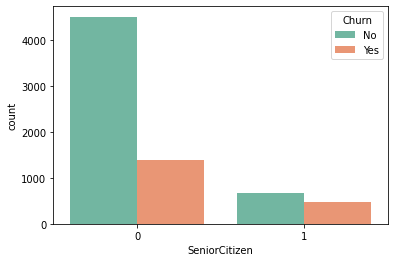

In [11]:
# Visualize the churn in relation to the age of the customer (whether the customer is considered senior on not).
sns.countplot(x='SeniorCitizen', hue='Churn', palette='Set2', data=data)

#### *Insight:* The majority of the customers that churn are not senior citizens.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

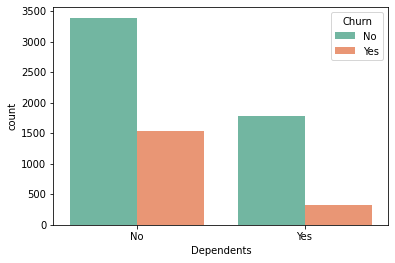

In [12]:
# Visualize the customer churn in relation to the dependents variable.
sns.countplot(x='Dependents', hue='Churn', palette='Set2', data=data)

#### *Insight:* The majority of the customers that left the company did not have dependents.

<AxesSubplot:xlabel='Partner', ylabel='count'>

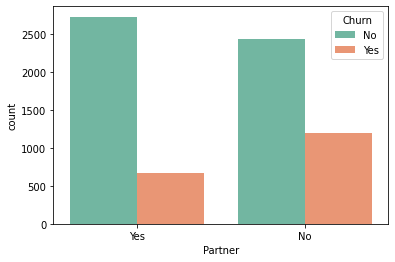

In [13]:
# Visualize the customer churn in relation to the partner variable.
sns.countplot(x='Partner', hue='Churn', palette='Set2', data=data)

#### *Insight:* It appears that most of the customers that churn, do not have partners.

### 2. Customer account information:

<AxesSubplot:xlabel='Contract', ylabel='count'>

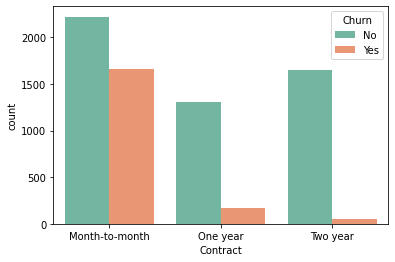

In [14]:
# Visualize the customer churn in relation to the contract.
sns.countplot(x='Contract', hue='Churn', palette='Set2', data=data)

#### *Insight:* Month-to-month contracts seem to have the highest amount of churned customers, while 2-year contracts have the least amount of churned customers, followed by 1-year contracts.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

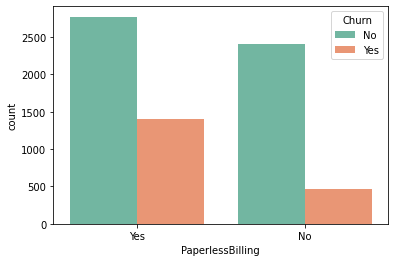

In [15]:
# Visualize the customer churn in relation to the paperless billing service.
sns.countplot(x='PaperlessBilling', hue='Churn', palette='Set2', data=data)

#### *Insight:*  The majority of the customers that left the company had opted for paperless billing.

[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

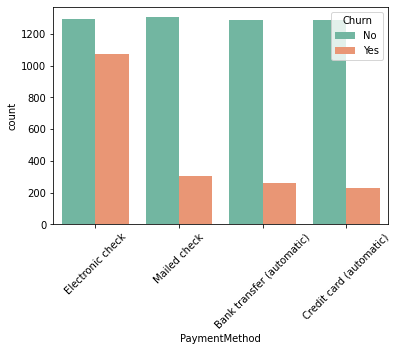

In [16]:
# Visualize the customer churn in relation to the payment method.
cplt=sns.countplot(x='PaymentMethod', hue='Churn', palette='Set2', data=data)
cplt.set_xticklabels(cplt.get_xticklabels(), rotation=45)

#### *Insight:* Most of the customers that churned had chosen the electronic check as the payment method. There is a significant difference between this payment method and the automatic ones (bank transfer, credit card) as well as the mailed check.

Text(0.5, 1.0, 'Tenure')

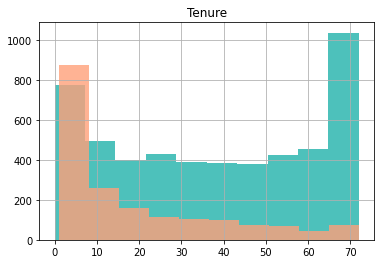

In [17]:
# Visualize the customer churn in relation to the number of months the customer has stayed with the company.
data[data.Churn == 'No']['tenure'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[data.Churn == 'Yes']['tenure'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Tenure')

#### *Insight:* Between 0 and 8 months, the possibility of a customers churning is high. However, the longer a customers stays in the company, the less likely he/she is to churn.

Text(0.5, 1.0, 'Monthly Charges')

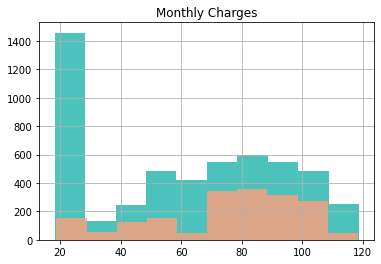

In [18]:
# Visualize the customer churn in relation to the customer's monthly charges.
data[data.Churn == 'No']['MonthlyCharges'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[data.Churn == 'Yes']['MonthlyCharges'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Monthly Charges')

#### *Insight:* The lower the amount of charges per month, the less likely the customer will churn. Especially for the range 18-28 dollars/month, the customer retention is extremely high. However, as the monthly charges increase, the probability of a customer churning increases as well.

### 3. Signed services:

<AxesSubplot:xlabel='InternetService', ylabel='count'>

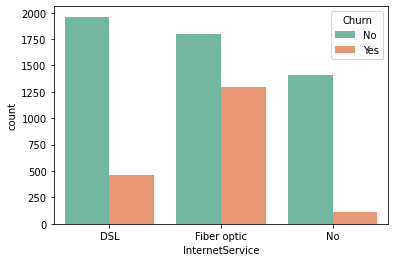

In [19]:
# Visualize the customer churn in relation to the internet service variable.
sns.countplot(x='InternetService', hue='Churn', palette='Set2', data=data)

#### *Insight:* It appears thet the majority of the customers that left the company had fiber optics, while the majority of the retained customers had a DSL internet service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

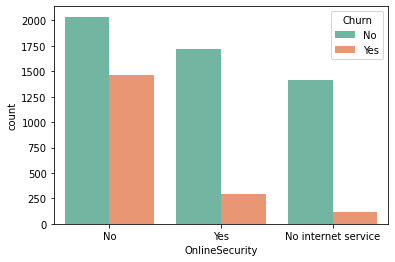

In [20]:
# Visualize the customer churn in relation to the online security variable.
sns.countplot(x='OnlineSecurity', hue='Churn', palette='Set2', data=data)

#### *Insight:* The majority of the customers that churned, did not have an online security.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

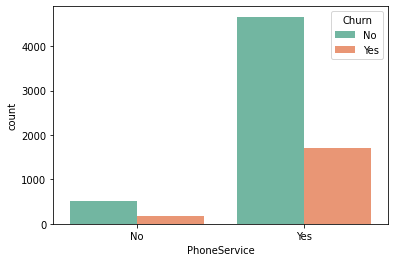

In [21]:
# Visualize the customer churn in relation to the phone service variable.
sns.countplot(x='PhoneService', hue='Churn', palette='Set2', data=data)

#### *Insight:* Most of the customers that get retained, already have a phone service with the company

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

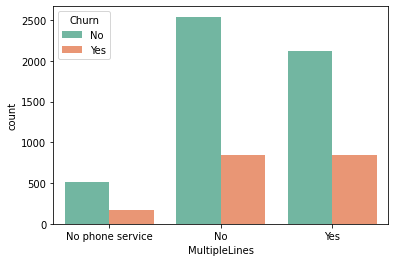

In [22]:
# Visualize the customer churn in relation to the multiple lines variable.
sns.countplot(x='MultipleLines', hue='Churn', palette='Set2', data=data)

#### *Insight:* The multiple lines service does not appear to be a significant factor when it comes to customer churn.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

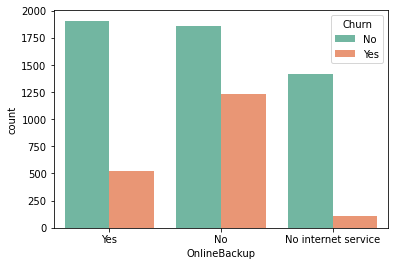

In [23]:
# Visualize the customer churn in relation to the online backup variable.
sns.countplot(x='OnlineBackup', hue='Churn', palette='Set2', data=data)

#### *Insight:* The majority of the customers that left the company did not have an online backup service.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

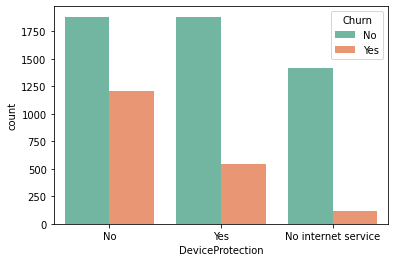

In [24]:
# Visualize the customer churn in relation to the device protection variable.
sns.countplot(x='DeviceProtection', hue='Churn', palette='Set2', data=data)

#### *Insight:* Most of the churned customers did not have a device protection service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

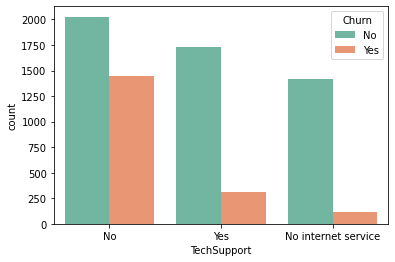

In [25]:
# Visualize the customer churn in relation to the tech support service.
sns.countplot(x='TechSupport', hue='Churn', palette='Set2', data=data)

#### *Insight:* The majority of the customers that churned did not have a tech support service.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

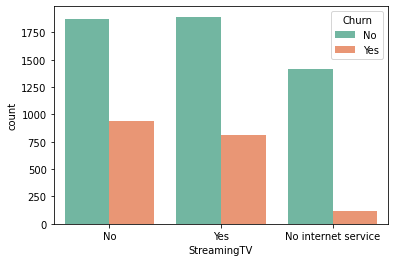

In [26]:
# Visualize the customer churn in relation to the streamingTV service.
sns.countplot(x='StreamingTV', hue='Churn', palette='Set2', data=data)

#### *Insight:* The streaming tv service does not appear to be significant when it comes to customer churn.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

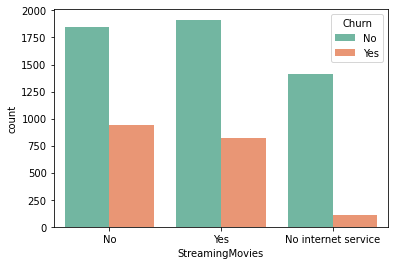

In [27]:
# Visualize the customer churn in relation to the streamingMovies service.
sns.countplot(x='StreamingMovies', hue='Churn', palette='Set2', data=data)

#### *Insight:* The streaming movies service does not appear to be a significant factor for customer churn.

# Data Processing & Cleaning

In [28]:
# Drop the column customerID, since it is not necessary for our analysis.
cleaned_data=data.drop('customerID', axis=1)
cleaned_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
# We convert the non-numerical variables to numerical.
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == np.number:
        continue
        cleaned_data[column] = LabelEncoder().fit_transform(cleaned_data[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# We check the new data types to make sure that they are numerical.
cleaned_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
# Check the 5 first rows of the cleaned dataset.
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# We scale the cleaned data so that the result comprises only values between 0 and 1. 
X = cleaned_data.drop('Churn', axis =1) 
y = cleaned_data['Churn']

In [33]:
# We perform one-hot encoding.
X=pd.get_dummies(X)

In [34]:
# We split the data into 80% for training and 20% for testing.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection
#### In order to predict the probability of a customer staying or leaving the company, we will use logistic regression. Logistic regression is a statistical model used by Machine Learning to perform classification, in order to predict the probability of a binary (yes/no) event occurring.

In [35]:
# We create the model.
model = LogisticRegression()
# We train the model.
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# Model evaluation

In [36]:
model_predictions = model.predict(x_test)
print(model_predictions)

['Yes' 'No' 'No' ... 'No' 'No' 'No']


In [37]:
# We check its precision, recall, f1-score and accuracy.
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



# Interpretation
#### Retained customers:
- The precision of the model is 86%, meaning that 86% of the results are relevant. 
- The recall of the model is 90%, meaning that 90% of the total relevant results were correctly classified by the model.
- The f1-score measuring the model's accuracy on the dataset is 88%, which is an ok result.

#### Churned customers: 
- The precision of the model is 69%, meaning that 69% of the results are relevant. 
- The recall of the model is 59%, meaning that 59% of the total relevant results were correctly classified by the model.
- The f1-score measuring the model's accuracy on the dataset is 64%, which is an ok result.

### The accuracy of the model is 82%, which indicates great model performance.

![](https://www.questback.com/wp-content/uploads/2022/07/Customer-churn-rate-1024x683.jpg)

# Recommendations for customer retention
### The Telco company could:
- consider lowering the monthly charges to increase customer retention.
- focus its efforts on the aquisition period of new customers (0-8 months), since the probabilities of customer churning are higher during that period.
- investigate possible service quality issues with its fiber optic service and -if that's the case- work on resolving them.
- consider proposing contracts with a starting duration of 1-2 year(s), since the churning probabilities are significantly lower in contrast to the month-to-month contracts.
- promote and eventually sign additional services to its customers, such as tech support, online backup, online security, etc., since the customers are more likely to stay in the company if they have signed up for other services as well.